In [1]:
import sys
sys.path.append("gpib_instrument_control")

import lecroy_9354tm
import yig_controller_test

yigControllerPort='/dev/ttyUSB0'

s = lecroy_9354tm.Lecroy9354Tm()
yc = yig_controller_test.YigController(yigControllerPort)

Waiting for init... Done


In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

def channelSweep(yigChannel=3):
    s.setVdiv('C1', 5)
    s.setCoupling('C1', "D1M")
    s.setTdiv(10e-6)
    s.setTrigSource('C1')
    s.setTrigMode('AUTO')
    s.setTrigCoupling('C1', 'AC')
    s.setTrigSlope('C1', 'POS')
    s.setTrigLevel('C1',0)
    s.setTrigDelayPct(50)
    s.opc()

    pk=[]
    avg=[]
    words= np.linspace(32767, -32768, 16)
    for v in words:
        v=int(v)
        #print("measuring control word", v)
        yc.yigA.set(yigChannel, v)
        time.sleep(0.5)
        w=s.getWaveform('C1')
        vpk=np.max(w.y)-np.min(w.y)
        vavg=np.mean(w.y)
        pk.append(vpk)
        avg.append(vavg)
        w.name=str(v)
        w.draw()
    
    w.show()
    plt.figure()
    plt.plot(words, pk, label='pk')
    plt.plot(words, avg, label='avg')
    plt.legend()
    return pk, avg

## Sweep of all channels as in schematic with 22ohm cement resistor as load

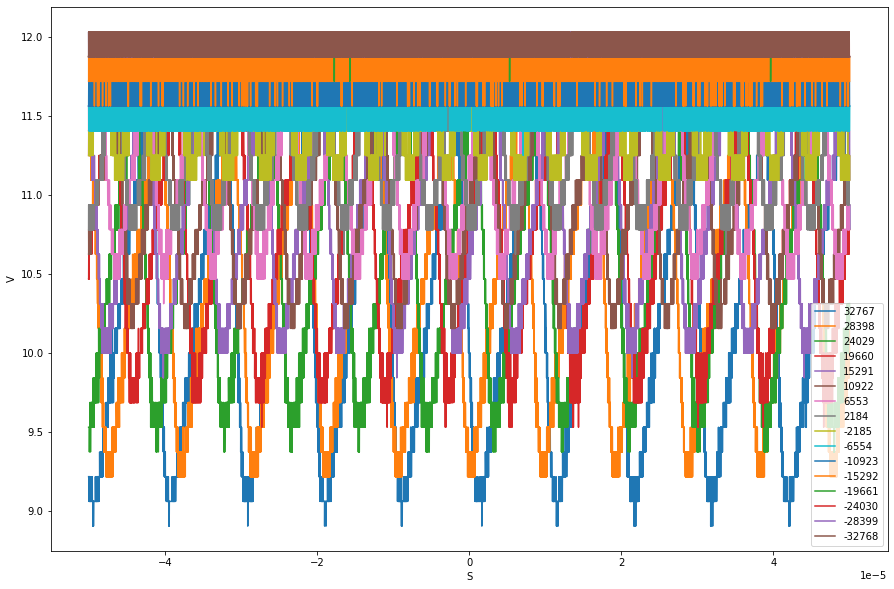

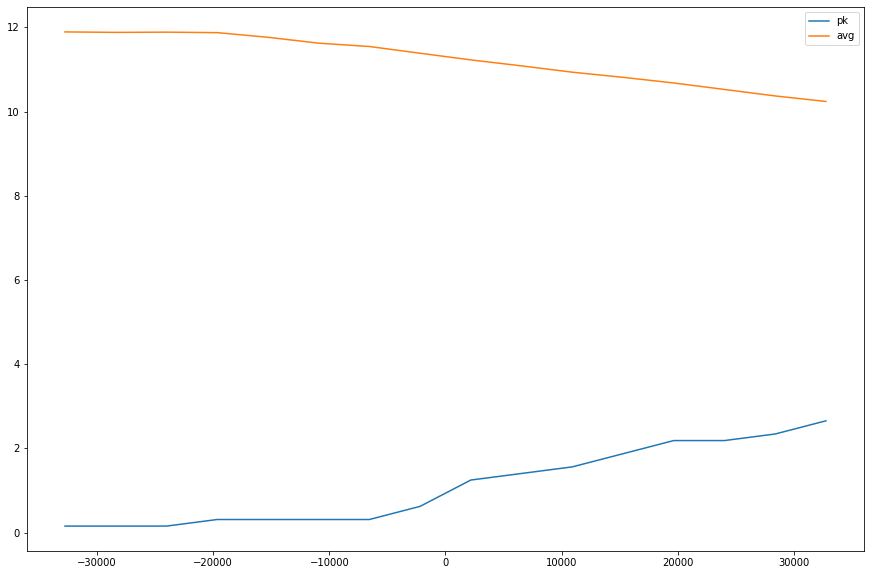

In [10]:
pk, avg = channelSweep(0)

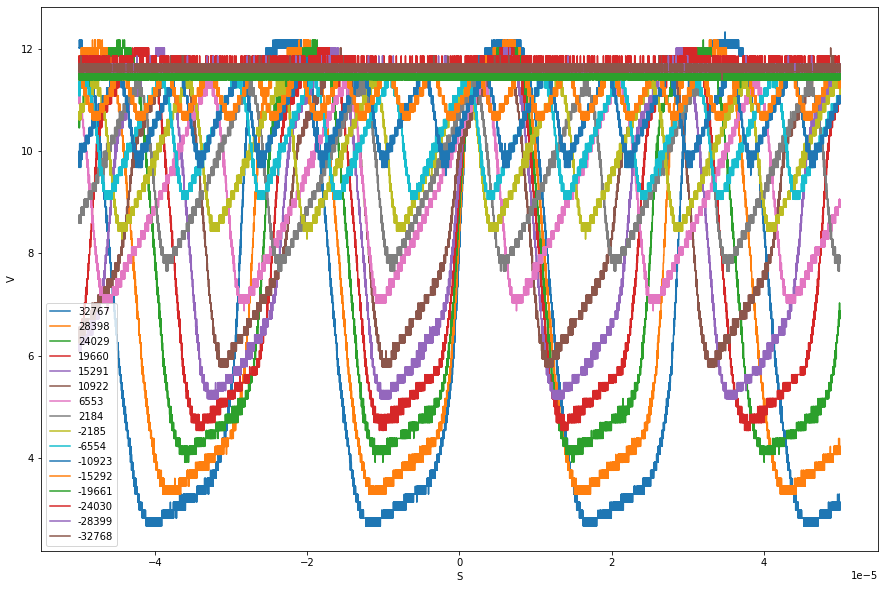

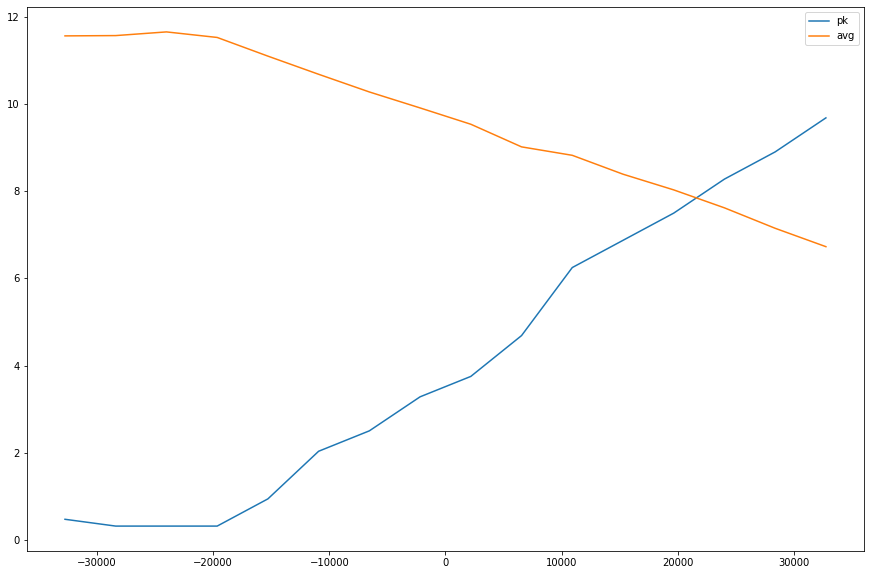

In [11]:
pk, avg = channelSweep(1)

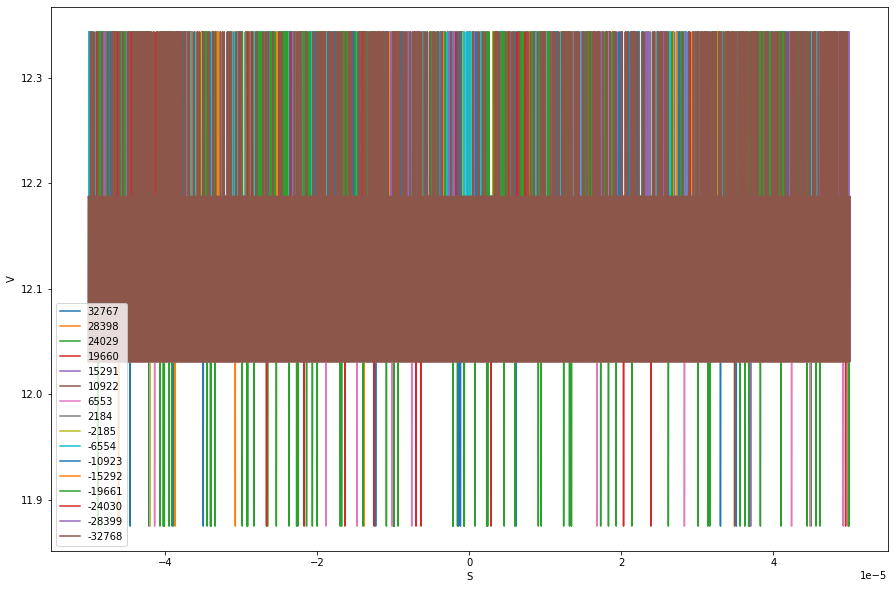

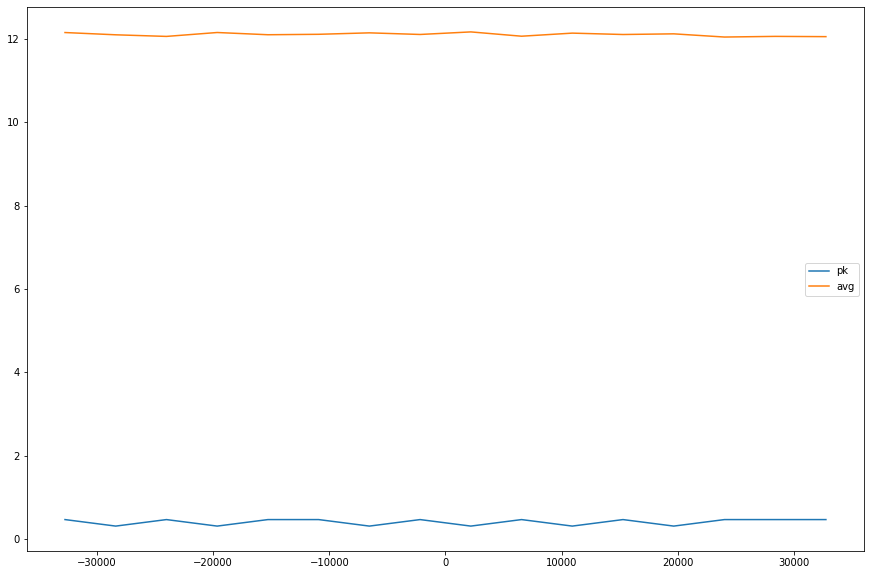

In [12]:
pk, avg = channelSweep(2)

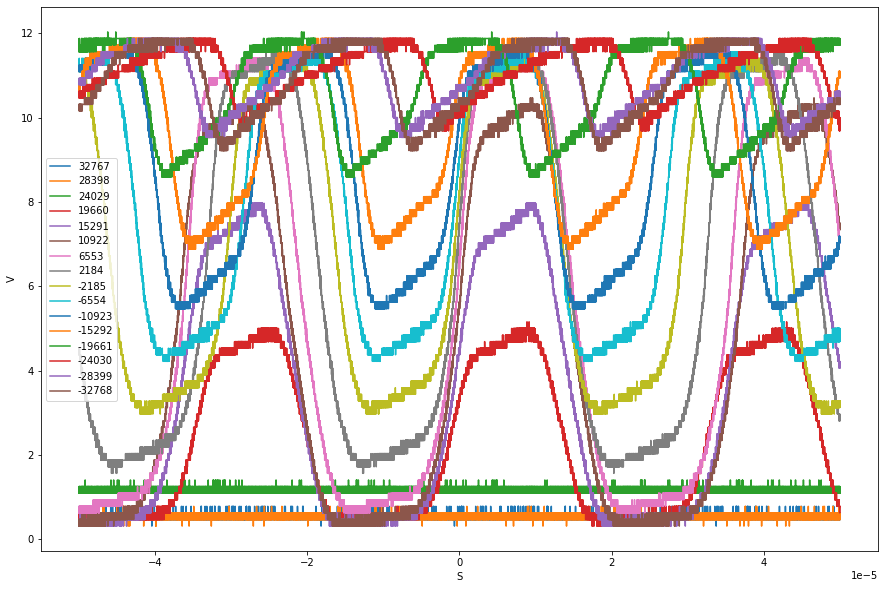

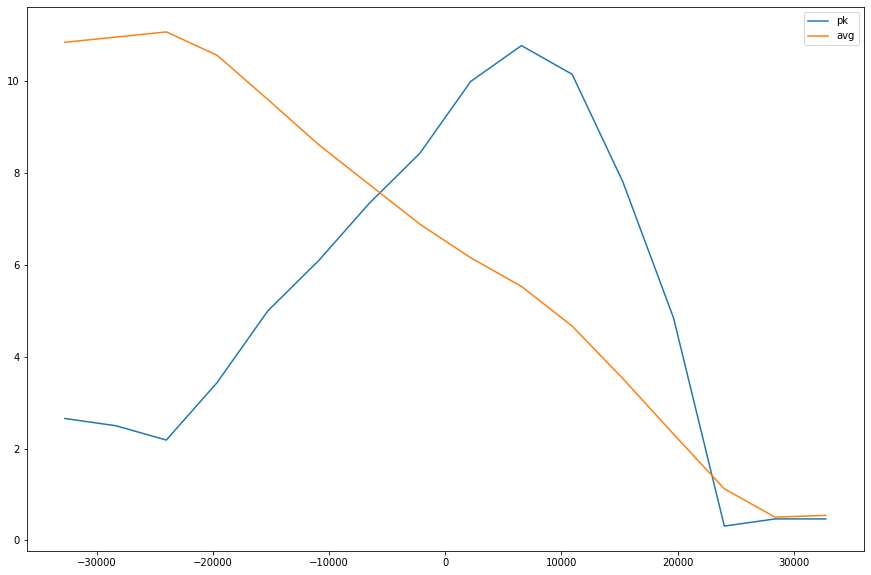

In [13]:
pk, avg = channelSweep(3)

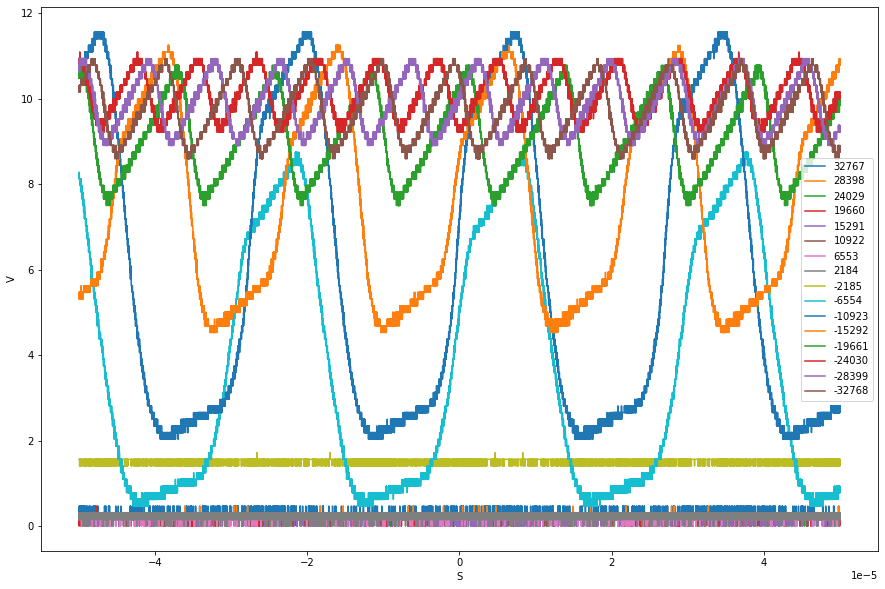

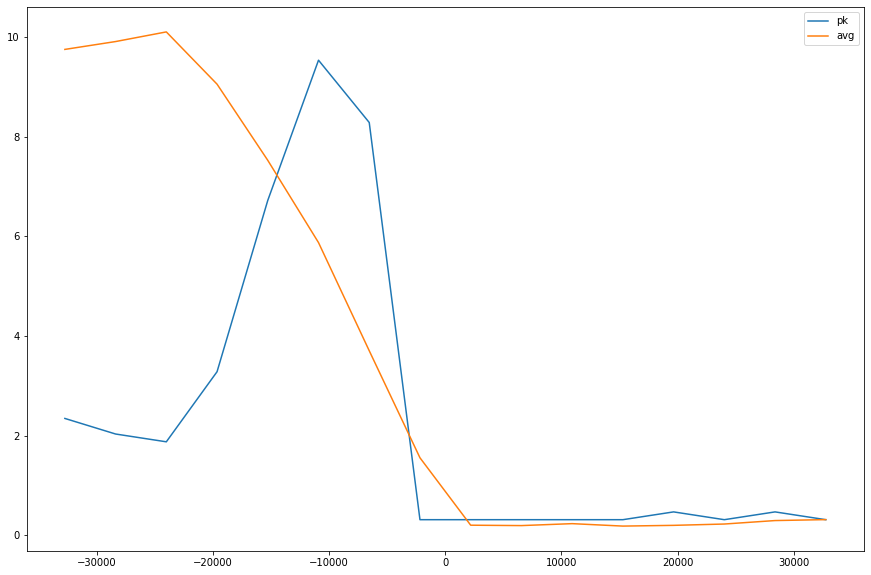

In [14]:
pk, avg = channelSweep(4)

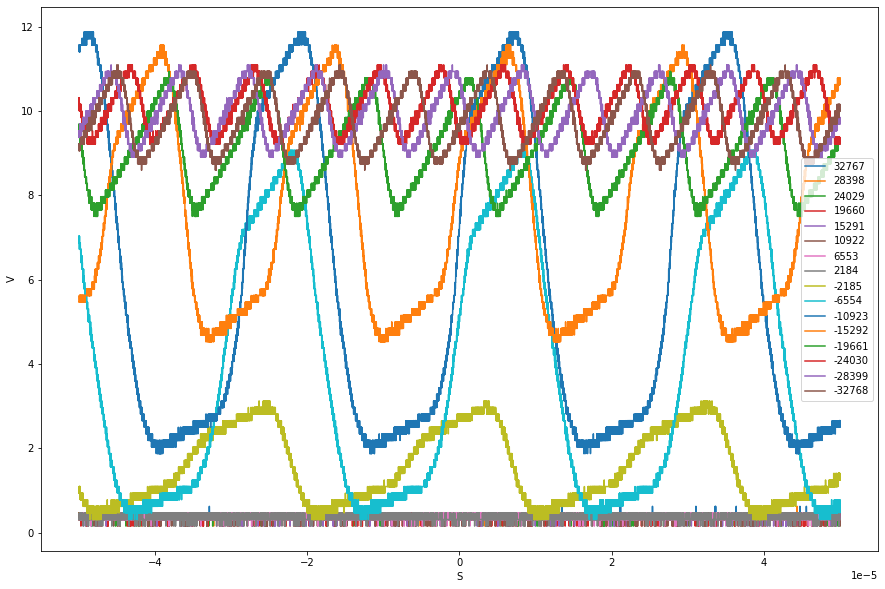

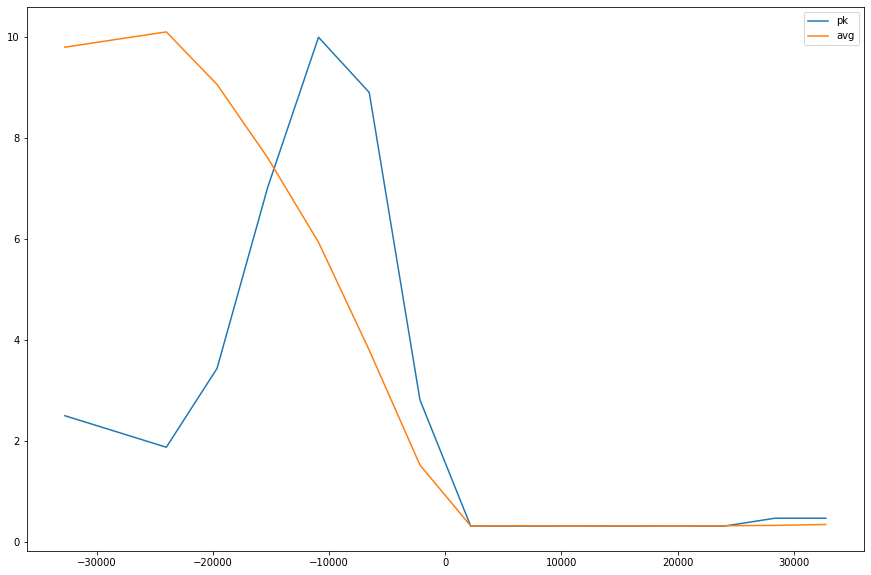

In [15]:
pk, avg = channelSweep(5)